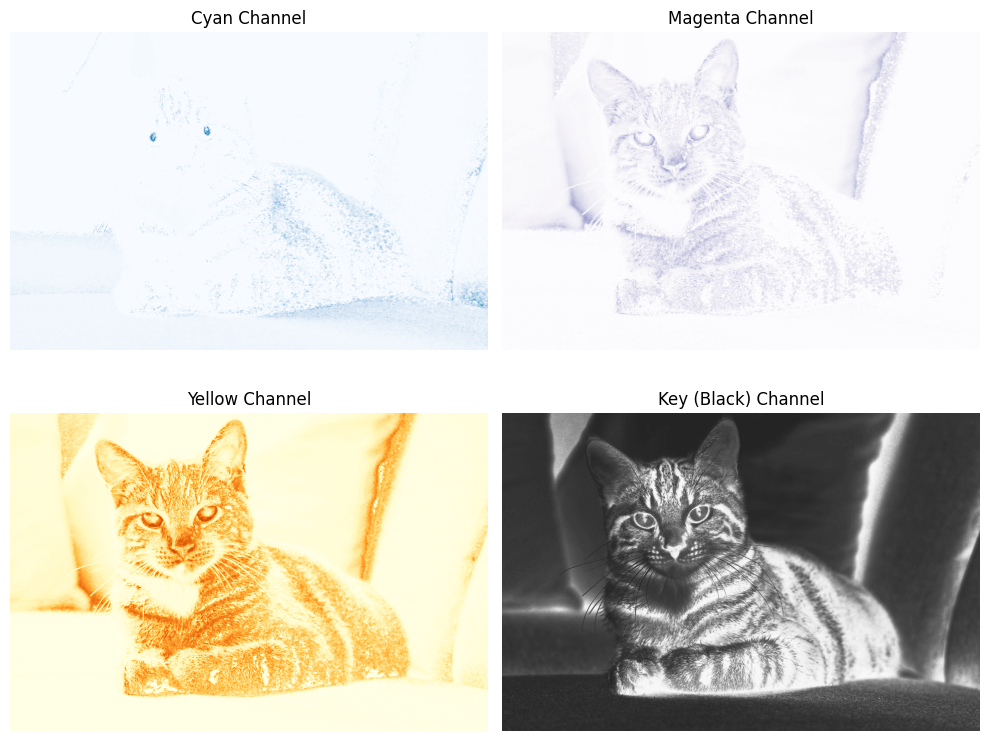

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 로드 (BGR로 읽기)
bgr_img = cv2.imread('example.jpg')

# BGR 이미지를 RGB로 변환
rgb_img = bgr_img[ ... , ::-1 ]

# RGB 값을 [0, 1] 범위로 정규화
rgb_img_norm = rgb_img.astype(float) / 255.0

# R, G, B 채널 분리
R = rgb_img_norm[ ... , 0]
G = rgb_img_norm[ ... , 1]
B = rgb_img_norm[ ... , 2]

# K 계산
K = 1 - np.max( rgb_img_norm, axis=2 )

# K 값이 1인 경우 방지 (완전한 검정)
K = np.where(K == 1, 0.999, K)

# C, M, Y 계산
C = (1 - R - K) / (1 - K)
M = (1 - G - K) / (1 - K)
Y = (1 - B - K) / (1 - K)

# 채널, 컬러맵, 타이틀을 하나의 리스트에 정의
channel_info = [
    (C, 'Blues', 'Cyan Channel'),
    (M, 'Purples', 'Magenta Channel'),
    (Y, 'YlOrBr', 'Yellow Channel'),
    (K, 'gray', 'Key (Black) Channel')
]

# 채널별 시각화
plt.figure(figsize=(10, 8))

for i, (channel, cmap, title) in enumerate(channel_info):
    plt.subplot(2, 2, i+1)
    plt.imshow(channel, cmap=cmap, vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
pass

plt.tight_layout()
plt.show()